In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [144]:
data = pd.read_csv('Advertising.csv')
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [145]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [146]:
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Exploratory Data Analysis

In [147]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [148]:
data.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


#### Lets check the null values without using visualization

In [149]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

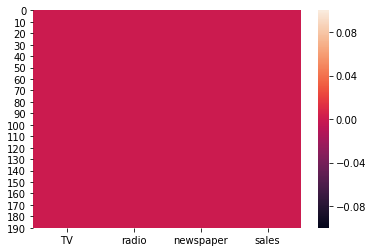

In [150]:
#Check the Null value through graph
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.isnull())
plt.show()

In [151]:
data = pd.DataFrame(data=data)
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [152]:
data.shape

(200, 4)

In [153]:
data.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [154]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [155]:
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [156]:
dfcor = data.corr()
dfcor

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


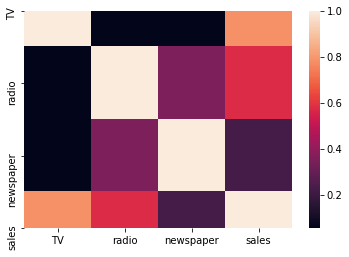

In [157]:
sns.heatmap(dfcor)

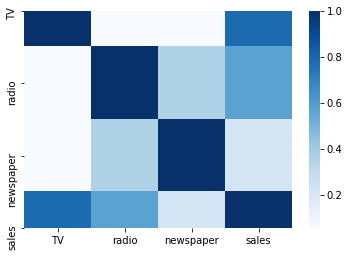

In [158]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Blues',annot=False)

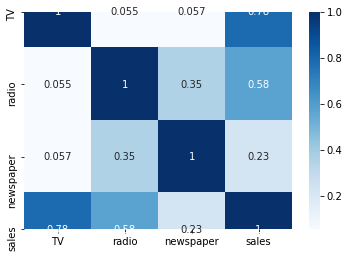

In [159]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Blues',annot=True)

#### Removing the Outliers

In [160]:
#Lets check for outliers
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data_final=data.loc[(z_score<3).all(axis=1)]
print(data_final.shape)

(200, 4)
(198, 4)


#### Checking Skewness and Removing it

In [161]:
#Check Skewness 
data.skew()
#there is some skewness which need to be treated,by seeing we can say only +ve skewness is significant and needs to be treated
#if value is 0.55 or more than that then there would be a skewed value

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [162]:
#Treating the skewness using log
import numpy as np
for col in data.columns:
#Here complete column name has been passed
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

In [163]:
#Lets Again Check the Skewness
data.skew()

TV          -0.069853
radio        0.094175
newspaper   -0.799875
sales        0.407571
dtype: float64

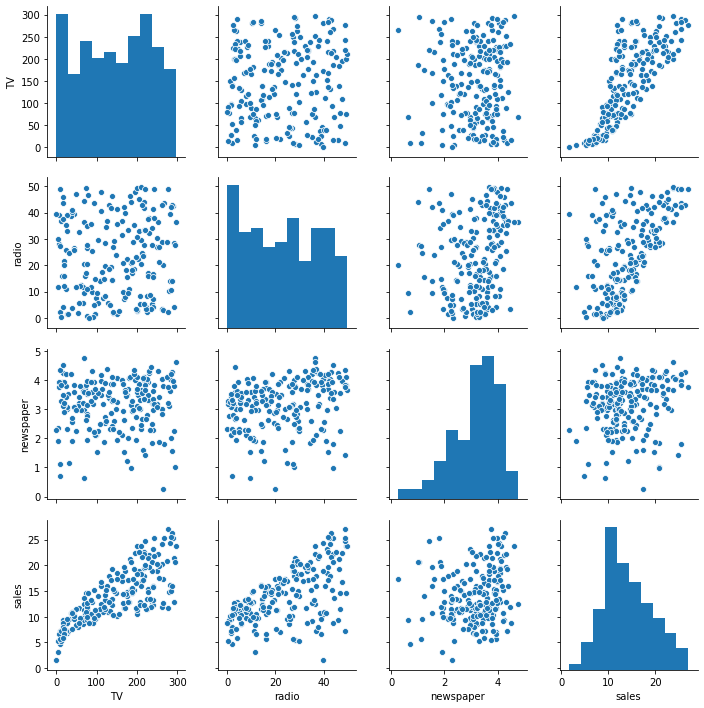

In [164]:
#Lets Check the pairplot using seaborn Library
import seaborn as sns
sns.pairplot(data)
plt.show()

### LinePlot

In [165]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

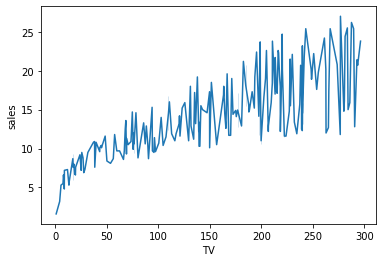

In [166]:
#Lets check the how TV is changing with respect to sales
sns.lineplot(data["TV"],data["sales"])
plt.show()
#The below graph clearly shows that with increase in TV there is increase in sales too 

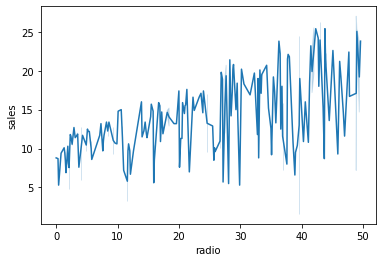

In [167]:
#Lets check the how radio is changing with respect to sales
sns.lineplot(data["radio"],data["sales"])
plt.show()
#The below graph  shows that with increase in radio there is substantial increase in sales too 

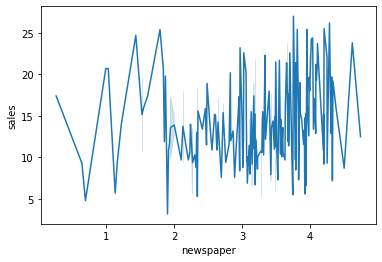

In [168]:
#Lets check the how newspaper is changing with respect to sales
sns.lineplot(data["newspaper"],data["sales"])
plt.show()
##The below graph  shows that with increase in newspaper has no such impact on sales

#### Plotting Boxplot through Iteration

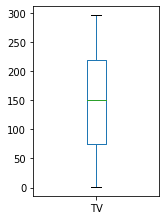

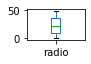

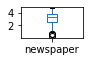

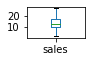

In [169]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(5,5,i+1)
    data.boxplot(col)
    plt.grid()
    plt.tight_layout()
    plt.show()

### Plotting Displot Through Iteration

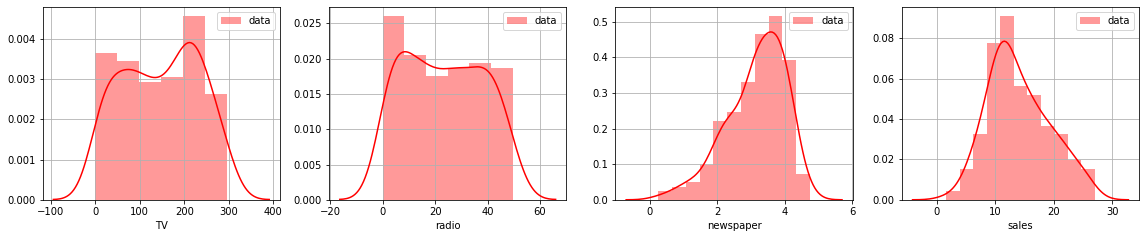

In [170]:
plt.figure(figsize=(20,16))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(data[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

### Plotting Data using Scatter Plot

In [171]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

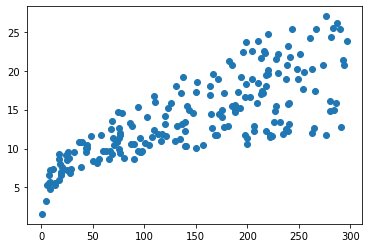

In [172]:
plt.scatter(data['TV'],data['sales'])

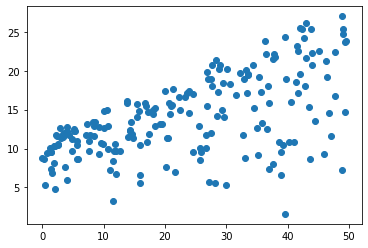

In [173]:
plt.scatter(data['radio'],data['sales'])

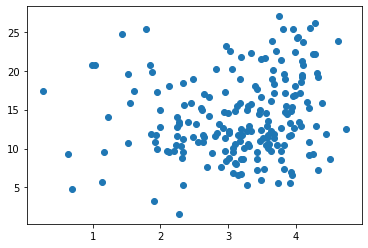

In [174]:
plt.scatter(data['newspaper'],data['sales'])

### Column Plot

In [175]:
collist = data.columns.values
ncols=12
nrows=10

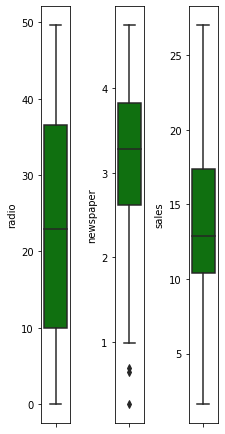

In [176]:
plt.figure(figsize=(ncols,5*ncols))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(data[collist[i]],color='green',orient='v')
    plt.tight_layout()

#### Separating X and Y Variable

In [177]:
data

,TV,radio,newspaper,sales
0,230.1,37.8,4.251348,22.1
1,44.5,39.3,3.830813,10.4
2,17.2,45.9,4.252772,9.3
3,151.5,41.3,4.085976,18.5
4,180.8,10.8,4.084294,12.9
...,...,...,...,...
195,38.2,3.7,2.694627,7.6
196,94.2,4.9,2.208274,9.7
197,177.0,9.3,2.001480,12.8
198,283.6,42.0,4.207673,25.5


In [178]:
X = data.drop("sales", axis=1)

In [179]:
X

,TV,radio,newspaper
0,230.1,37.8,4.251348
1,44.5,39.3,3.830813
2,17.2,45.9,4.252772
3,151.5,41.3,4.085976
4,180.8,10.8,4.084294
...,...,...,...
195,38.2,3.7,2.694627
196,94.2,4.9,2.208274
197,177.0,9.3,2.001480
198,283.6,42.0,4.207673


In [180]:
Y = data["sales"]
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [181]:
X.shape

(200, 3)

In [182]:
Y.shape

(200,)

In [183]:
Y = Y.values.reshape(-1,1)

In [184]:
Y

array([[22.1],
       [10.4],
       [ 9.3],
       [18.5],
       [12.9],
       [ 7.2],
       [11.8],
       [13.2],
       [ 4.8],
       [10.6],
       [ 8.6],
       [17.4],
       [ 9.2],
       [ 9.7],
       [19. ],
       [22.4],
       [12.5],
       [24.4],
       [11.3],
       [14.6],
       [18. ],
       [12.5],
       [ 5.6],
       [15.5],
       [ 9.7],
       [12. ],
       [15. ],
       [15.9],
       [18.9],
       [10.5],
       [21.4],
       [11.9],
       [ 9.6],
       [17.4],
       [ 9.5],
       [12.8],
       [25.4],
       [14.7],
       [10.1],
       [21.5],
       [16.6],
       [17.1],
       [20.7],
       [12.9],
       [ 8.5],
       [14.9],
       [10.6],
       [23.2],
       [14.8],
       [ 9.7],
       [11.4],
       [10.7],
       [22.6],
       [21.2],
       [20.2],
       [23.7],
       [ 5.5],
       [13.2],
       [23.8],
       [18.4],
       [ 8.1],
       [24.2],
       [15.7],
       [14. ],
       [18. ],
       [ 9.3],
       [ 9

In [185]:
Y.shape

(200, 1)

#### Applying Linear Regression

In [186]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.33,random_state=39)

In [187]:
train_X.shape

(134, 3)

In [188]:
train_Y.shape

(134, 1)

In [189]:
lg = LinearRegression()

In [190]:
lg.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [191]:
lg.coef_

array([[0.04646439, 0.19219856, 0.07729878]])

In [192]:
lg.intercept_

array([2.44579732])

In [193]:
lg.score(train_X,train_Y)

0.8984636386051144

In [194]:
#predict the value
pred=lg.predict(test_X)
print("Predicted result price:",pred)
print("actual price",test_Y)

Predicted result price: [[22.2105626 ]
 [18.22643461]
 [ 6.36278103]
 [ 9.01991261]
 [11.83789424]
 [ 8.18001981]
 [ 4.30233204]
 [17.29392912]
 [16.41510732]
 [ 8.84459512]
 [14.11549978]
 [12.58330772]
 [14.45507711]
 [11.66886624]
 [12.39563302]
 [13.89738205]
 [16.55710815]
 [14.20686783]
 [ 3.38497069]
 [ 6.95013899]
 [13.28716307]
 [14.33930774]
 [14.70390993]
 [ 6.41840111]
 [ 4.3355601 ]
 [13.89481078]
 [14.93209302]
 [15.47412065]
 [25.00067279]
 [13.0799719 ]
 [ 7.8141465 ]
 [ 9.327101  ]
 [21.4509249 ]
 [18.31802244]
 [ 5.55636597]
 [12.46873224]
 [16.31574034]
 [ 7.2277322 ]
 [23.55207962]
 [ 9.8573303 ]
 [23.44419131]
 [10.74518966]
 [ 7.32602723]
 [18.59773218]
 [11.4954948 ]
 [ 9.58765994]
 [13.53226084]
 [21.4999393 ]
 [24.40492964]
 [23.10456094]
 [10.86023241]
 [18.52579787]
 [ 8.62446084]
 [ 9.08990868]
 [19.62763218]
 [12.60133613]
 [ 7.99104329]
 [ 9.80800986]
 [20.87300403]
 [14.91873194]
 [17.84764041]
 [19.46005582]
 [ 6.3517592 ]
 [15.61804287]
 [14.70946532]
 

In [195]:
from sklearn.metrics import mean_squared_error, r2_score

print('error:')

print('Mean absolute error:',mean_absolute_error(test_Y,pred))
print('Mean sqaured error:',mean_squared_error(test_Y,pred))

print('Root mean squared error:',np.sqrt(mean_squared_error(test_Y,pred)))
print('R2 Score of lg: %.2f' % r2_score(test_Y, pred))

error:
Mean absolute error: 1.4279464091733947
Mean sqaured error: 3.1310835591231934
Root mean squared error: 1.7694868067106897
R2 Score of lg: 0.89


#### Boost through GradientBoostRegressor By using Parameters

In [196]:
from sklearn import ensemble
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
modelgbr = ensemble.GradientBoostingRegressor(**params)

modelgbr.fit(train_X, train_Y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [197]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = modelgbr.score(train_X,train_Y)
print("model_Score:",model_score)


y_predictedgbr = modelgbr.predict(test_X)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(test_Y, y_predictedgbr))
# Explained variance score: 1 is perfect prediction
print('R2 Score: %.2f' % r2_score(test_Y, y_predictedgbr))

model_Score: 0.999275172266374
Mean squared error: 0.73
R2 Score: 0.98


#### Lets Visualize the Goodness of the Prediction

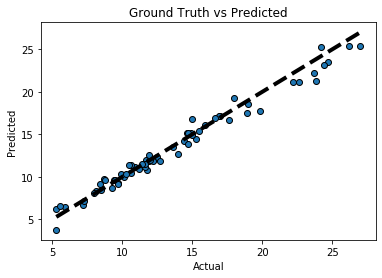

In [198]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(test_Y, y_predictedgbr, edgecolors=(0, 0, 0))
ax.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

### Linear Regression using Recursion

In [199]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,random_state=55,test_size=0.20)

In [200]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,X,Y):
    max_r_score=0
    for r_state in range(42,100):
        train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.20,random_state=r_state)
        regr.fit(train_X,train_Y)
        y_pred = regr.predict(test_X)
        r2_scr=r2_score(test_Y,y_pred)
        print("r2 score corresponding to ",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state,"is",max_r_score)
    return final_r_state

In [201]:
# Lets use LinearRegression and check the max r2 score corresponding to different state
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
r_state = maxr2_score(lreg,X,Y)

r2 score corresponding to  42 is 0.8996743470591734
r2 score corresponding to  43 is 0.9278006427530694
r2 score corresponding to  44 is 0.8307354623475125
r2 score corresponding to  45 is 0.8951874656511893
r2 score corresponding to  46 is 0.8502747923160441
r2 score corresponding to  47 is 0.8861535196315131
r2 score corresponding to  48 is 0.9199526417276469
r2 score corresponding to  49 is 0.8249642083513499
r2 score corresponding to  50 is 0.8469693454551066
r2 score corresponding to  51 is 0.9049819936668555
r2 score corresponding to  52 is 0.8813753894105311
r2 score corresponding to  53 is 0.9256875638861686
r2 score corresponding to  54 is 0.9182888279066231
r2 score corresponding to  55 is 0.9038303226842745
r2 score corresponding to  56 is 0.8895696209473445
r2 score corresponding to  57 is 0.9412101362997594
r2 score corresponding to  58 is 0.8406697298254625
r2 score corresponding to  59 is 0.9251717743473579
r2 score corresponding to  60 is 0.9108160996624977
r2 score cor

### KNN Model

In [202]:
from sklearn.neighbors import KNeighborsRegressor
knr1 = KNeighborsRegressor()
knr1.fit(train_X,train_Y)
knr1.score(train_X,train_Y)
predicted=knr1.predict(test_X)
print("Mean squared error of knn: %.2f"% mean_squared_error(test_Y,predicted))
print('R2 Score of linear knn: %.2f' % r2_score(test_Y, predicted))

Mean squared error of knn: 0.74
R2 Score of linear knn: 0.97


In [203]:
#Lets use the Grid Search to Find the Optimal Value of n_neighbors in Knn Model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors
neighbors={"n_neighbors":range(1,30)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr,neighbors,cv=10)
gknr.fit(X,Y)
gknr.best_params_

{'n_neighbors': 3}

In [204]:
#Lets Use Knn Regression and Check max r2 score corresponding to different random states
knr = KNeighborsRegressor(n_neighbors=3)
r_state = maxr2_score(knr,X,Y)

r2 score corresponding to  42 is 0.9727006159852547
r2 score corresponding to  43 is 0.9629275483402363
r2 score corresponding to  44 is 0.9162285540595307
r2 score corresponding to  45 is 0.9483852326393578
r2 score corresponding to  46 is 0.9534315429034935
r2 score corresponding to  47 is 0.9670642534580132
r2 score corresponding to  48 is 0.9695352866320163
r2 score corresponding to  49 is 0.9509874210401206
r2 score corresponding to  50 is 0.9532955428937098
r2 score corresponding to  51 is 0.9564349229126627
r2 score corresponding to  52 is 0.9650797434327518
r2 score corresponding to  53 is 0.9790566285719587
r2 score corresponding to  54 is 0.9687215697191763
r2 score corresponding to  55 is 0.9621472514943892
r2 score corresponding to  56 is 0.9703495491849609
r2 score corresponding to  57 is 0.961978985976665
r2 score corresponding to  58 is 0.9583095007918982
r2 score corresponding to  59 is 0.9731401900207539
r2 score corresponding to  60 is 0.9653450775592232
r2 score corr

In [205]:
#Lets check the mean r2 score of both linear regression model and knn regression 
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 scorefor Linear Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").std())
print()
print("Mean r2 score for KNN Regression: ",cross_val_score(knr,X,Y,cv=5,scoring="r2").mean())
print("Stadard deviation in r2 score for KNN Regression:",cross_val_score(knr,X,Y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression: 0.8878198635211845
Standard deviation in r2 scorefor Linear Regression: 0.0392299536891096

Mean r2 score for KNN Regression:  0.9620765050266311
Stadard deviation in r2 score for KNN Regression: 0.006095455600904392


### Boosting Linear Regression

In [206]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg1=AdaBoostRegressor()
add_reg1=AdaBoostRegressor(base_estimator=lreg,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg1,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg1,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.9516924569211384
Standard deviation in r2 score for ada boosting Regression:  0.012212700937524629


### Boosting KNN model

In [207]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg2=AdaBoostRegressor()
add_reg2=AdaBoostRegressor(base_estimator=knr,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg2,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg2,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.9524960049544999
Standard deviation in r2 score for ada boosting Regression:  0.013060271930298581


#### Lets check lasso regression and best value of alpha

In [208]:
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsreg,parameters,cv=10)
clf.fit(X,Y)
clf.best_params_

{'alpha': 0.1}

In [209]:
#Lets use cross val score with Lasso
lasso_grs=Lasso(alpha = 0.1)
print("Mean r2 score for Lasso Regression: ",cross_val_score(lasso_grs,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for Lasso Regression: ",cross_val_score(lasso_grs,X,Y,cv=5,scoring="r2").std())

Mean r2 score for Lasso Regression:  0.8892843289533665
Standard deviation in r2 score for Lasso Regression:  0.037680177697708046


### Boosting Lasso Regressor

In [210]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg3=AdaBoostRegressor()
add_reg3=AdaBoostRegressor(base_estimator=lasso_grs,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg3,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg3,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.9519225383980778
Standard deviation in r2 score for ada boosting Regression:  0.012651179778766206


### Support Vector Regression

In [211]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

svr1 = SVR(kernel = "linear")
svr1.fit(train_X,train_Y)
svr1.score(train_X,train_Y)
y_pred1=svr1.predict(test_X)
print("Mean squared error of linear svc: %.2f"% mean_squared_error(test_Y,y_pred1))
print('R2 Score of linear svc: %.2f' % r2_score(test_Y, y_pred1))

Mean squared error of linear svc: 3.54
R2 Score of linear svc: 0.86


#### Grid Search CV in Support Vector Regressor

In [212]:
from sklearn.svm import SVR
import numpy as np
parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
svr = SVR()
grs = GridSearchCV(svr, parameters,refit = True, verbose = 3)
grs.fit(X,Y)
grs.best_params_

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear, score=0.906, total=   0.7s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear, score=0.842, total=   0.7s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear ..................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear, score=0.901, total=   0.5s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf .....................
[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf, score=-0.076, total=   0.0s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf .....................
[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf, score=0.023, total=   0.0s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf .....................
[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf, score=0.048, total=   0.0s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=poly ....................
[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=poly, score=-0.124, total=   0.0s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=poly ....................
[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=poly, score=-0.030, total=   0.0s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=poly ....................
[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=poly, score=-0.008, total=   0.0s
[CV] C=1.5, epsilo

[CV]  C=1.5, epsilon=0.3, gamma=0.0001, kernel=linear, score=0.906, total=   0.6s
[CV] C=1.5, epsilon=0.3, gamma=0.0001, kernel=linear .................
[CV]  C=1.5, epsilon=0.3, gamma=0.0001, kernel=linear, score=0.852, total=   0.4s
[CV] C=1.5, epsilon=0.3, gamma=0.0001, kernel=linear .................
[CV]  C=1.5, epsilon=0.3, gamma=0.0001, kernel=linear, score=0.896, total=   0.5s
[CV] C=1.5, epsilon=0.3, gamma=0.0001, kernel=rbf ....................
[CV]  C=1.5, epsilon=0.3, gamma=0.0001, kernel=rbf, score=0.934, total=   0.0s
[CV] C=1.5, epsilon=0.3, gamma=0.0001, kernel=rbf ....................
[CV]  C=1.5, epsilon=0.3, gamma=0.0001, kernel=rbf, score=0.930, total=   0.0s
[CV] C=1.5, epsilon=0.3, gamma=0.0001, kernel=rbf ....................
[CV]  C=1.5, epsilon=0.3, gamma=0.0001, kernel=rbf, score=0.919, total=   0.0s
[CV] C=1.5, epsilon=0.3, gamma=0.0001, kernel=poly ...................
[CV]  C=1.5, epsilon=0.3, gamma=0.0001, kernel=poly, score=0.900, total=   0.0s
[CV] C=1.5,

[CV]  C=10, epsilon=0.5, gamma=0.0001, kernel=linear, score=0.847, total=   1.9s
[CV] C=10, epsilon=0.5, gamma=0.0001, kernel=linear ..................
[CV]  C=10, epsilon=0.5, gamma=0.0001, kernel=linear, score=0.896, total=   4.6s
[CV] C=10, epsilon=0.5, gamma=0.0001, kernel=rbf .....................
[CV]  C=10, epsilon=0.5, gamma=0.0001, kernel=rbf, score=0.991, total=   0.0s
[CV] C=10, epsilon=0.5, gamma=0.0001, kernel=rbf .....................
[CV]  C=10, epsilon=0.5, gamma=0.0001, kernel=rbf, score=0.976, total=   0.0s
[CV] C=10, epsilon=0.5, gamma=0.0001, kernel=rbf .....................
[CV]  C=10, epsilon=0.5, gamma=0.0001, kernel=rbf, score=0.990, total=   0.0s
[CV] C=10, epsilon=0.5, gamma=0.0001, kernel=poly ....................
[CV]  C=10, epsilon=0.5, gamma=0.0001, kernel=poly, score=0.911, total=   0.0s
[CV] C=10, epsilon=0.5, gamma=0.0001, kernel=poly ....................
[CV]  C=10, epsilon=0.5, gamma=0.0001, kernel=poly, score=0.834, total=   0.0s
[CV] C=10, epsilon=0

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:  1.8min finished


{'C': 10, 'epsilon': 0.3, 'gamma': 0.0001, 'kernel': 'rbf'}

In [213]:
svr_grs=SVR(C=10, epsilon=0.3, gamma=0.0001, kernel='rbf')
print("Mean r2 score for ada boosting Regression: ",cross_val_score(svr_grs,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(svr_grs,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.9875979757489626
Standard deviation in r2 score for ada boosting Regression:  0.010836927195325119


### Boosting Support Vector Machine

In [214]:
from sklearn.ensemble import AdaBoostRegressor

In [215]:
ada_reg4=AdaBoostRegressor()
add_reg4=AdaBoostRegressor(base_estimator=svr_grs,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg4,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg4,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.9500581108190019
Standard deviation in r2 score for ada boosting Regression:  0.012735548033741996


### Decision Tree Regressor

In [216]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
  

dtregressor = DecisionTreeRegressor(random_state = 0)  
  
 
dtregressor.fit(X, Y) 

dtregressor.score(train_X,train_Y)
y_pred4=dtregressor.predict(test_X)
print("Mean squared error of Decision Tree Regressor: %.2f"% mean_squared_error(test_Y,y_pred4))
print('R2 Score : %.2f' % r2_score(test_Y, y_pred4))

Mean squared error of Decision Tree Regressor: 0.00
R2 Score : 1.00


### Decision Tree Regressor Using GridSearchCV

In [217]:
dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm.fit(X,Y)
print("R-Squared on train dataset={}".format(dtm.score(test_X,test_Y)))

dtm.fit(test_X,test_Y)   
print("R-Squaredon test dataset={}".format(dtm.score(test_X,test_Y)))

R-Squared on train dataset=0.9263624249762629
R-Squaredon test dataset=0.9726454040353391


In [218]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }


grid_cv_dtm = GridSearchCV(dtm, param_grid, cv=5)

grid_cv_dtm.fit(X,Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=4,
                                             max_features=None,
                                             max_leaf_nodes=10,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=5,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                      

In [219]:
print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

R-Squared::0.8221105647986653
Best Hyperparameters::
{'criterion': 'mse', 'max_depth': 6, 'max_leaf_nodes': 100, 'min_samples_leaf': 20, 'min_samples_split': 10}


### Boosting Decision Tree

In [220]:
from sklearn.ensemble import AdaBoostRegressor

In [221]:
ada_reg5=AdaBoostRegressor()
add_reg5=AdaBoostRegressor(base_estimator=dtm,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(add_reg5,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(add_reg5,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.9213744544367881
Standard deviation in r2 score for ada boosting Regression:  0.0142001408708771


### Random Forest Regressor

In [222]:
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor(n_estimators=5)
rfregressor.fit(train_X, train_Y)
y_pred5 = rfregressor.predict(test_X)
print("Mean squared error of poly svc: %.2f"% mean_squared_error(test_Y,y_pred5))
print('R2 Score : %.2f' % r2_score(test_Y, y_pred5))

Mean squared error of poly svc: 1.03
R2 Score : 0.96


#### Random Forest Regressor with GridSearchCV

In [223]:
rf_gs = RandomForestRegressor(n_estimators=100)

In [224]:
n_features = X.shape[1]

In [225]:
from sklearn.model_selection import RandomizedSearchCV
grid = RandomizedSearchCV(rf_gs, n_iter=20, 
            param_distributions=dict(
                                          max_depth=np.arange(5,20+1), 
                                          max_features=np.arange(1, n_features+1)
                                    )
         )
grid.fit(X, Y)
print(grid.best_params_)

{'max_features': 3, 'max_depth': 9}


In [226]:
rf_gss = RandomForestRegressor(max_features = 3, max_depth = 14)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(rf_gss,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(rf_gss,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.9689833441111491
Standard deviation in r2 score for ada boosting Regression:  0.00946671556311162


#### Boosting RandomForestRegressor

In [227]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg6=AdaBoostRegressor()
add_reg6=AdaBoostRegressor(base_estimator=rfregressor,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(add_reg6,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(add_reg6,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.9748161118369069
Standard deviation in r2 score for ada boosting Regression:  0.010427397410435411


In [228]:
#Lets save the above model
from sklearn.externals import joblib

#Save the model as pickle in a file
joblib.dump(add_reg6,'Advertising.pkl')

['Advertising.pkl']